In [2]:
import pandas as pd
import numpy as np
from numpy import mean, std
import keras
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from keras.utils import to_categorical, np_utils
from sklearn.metrics import confusion_matrix, accuracy_score
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, MaxPooling2D, BatchNormalization
from keras.callbacks import ReduceLROnPlateau
from keras.preprocessing import image
from keras.optimizers import SGD
from sklearn.model_selection import KFold
from keras.models import load_model


In [30]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml("mnist_784",  parser="auto")

# EDA

In [31]:
mnist.keys()

dict_keys(['data', 'target', 'frame', 'categories', 'feature_names', 'target_names', 'DESCR', 'details', 'url'])

In [32]:
X_data, y_target = mnist.data, mnist.target
X_data

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
69998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
print(y_target.shape)
print(X_data.shape)

# check NaN values in the dataset
print(X_data.isna().any().any())
print(y_target.isna().any().any())

(70000,)
(70000, 784)
False
False


In [34]:
# Displays  handwritten digit images
def digits(Nbr):
    """Picks-up randomly N images within the 
    train dataset between 0 and 69999 and displays the images
    with 4 images/row"""
    
    
    images = np.random.randint(low=0, high=42001, size=Nbr).tolist()
    
    subset_images = X_data.iloc[images,:]
    subset_images.index = range(1, Nbr+1)


    for i, row in subset_images.iterrows():
        plt.subplot((Nbr//8)+1, 8, i)
        pixels = row.values.reshape((28,28))
        plt.imshow(pixels, cmap='gray')
        plt.xticks([])
        plt.yticks([])
    
    plt.show()

    return ""

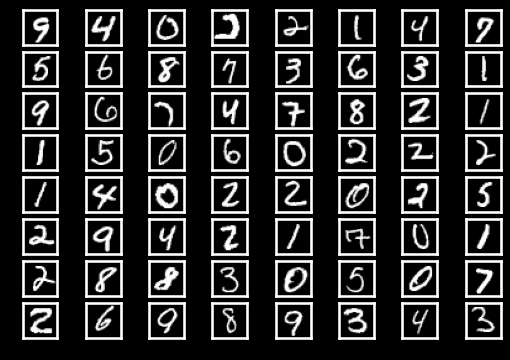

''

In [35]:
digits(64)

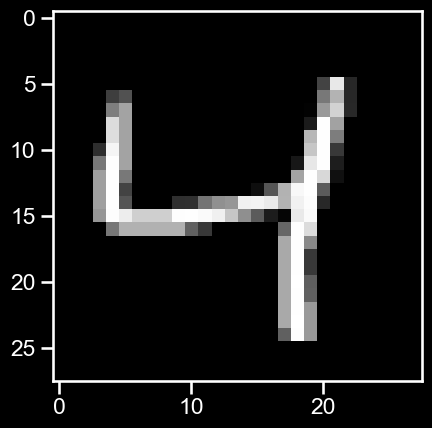

In [36]:
def to_image(array):
    # Reshape an array into an image format
    array = np.array(array)
   
    return array[0:].reshape(28,28).astype(float)
        
# Display one image
img = to_image(X_data.iloc[2])
plt.imshow(img, cmap = 'gray')
plt.show()

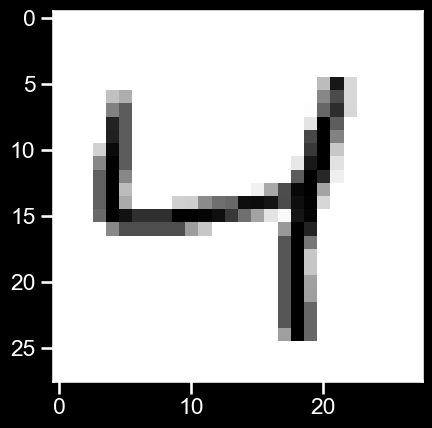

In [37]:
# EXTRA CODE
def image(array):
    # Reshape an array into an image format
    array = np.array(array)
   
    return array[0:].reshape(28,28).astype(float)
        
# Display one image
img = to_image(X_data.iloc[2])
plt.imshow(img, cmap=mpl.cm.binary)
plt.show()

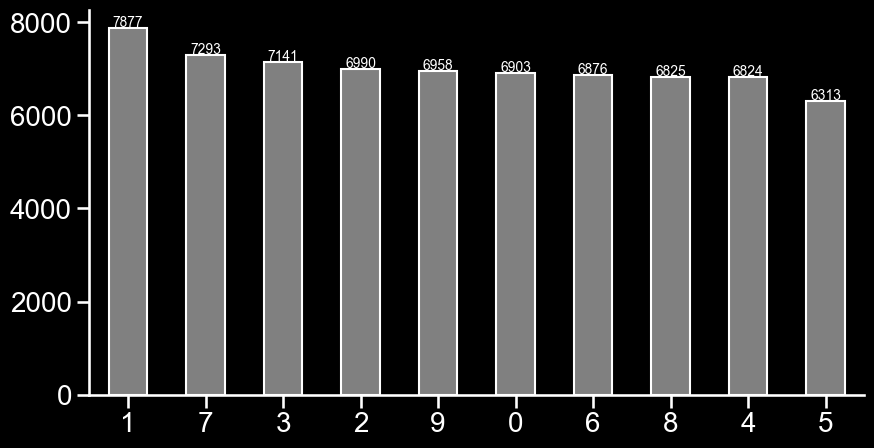

In [38]:
# #Distribution of the digits in the dataset
sns.set(style="ticks", context="talk",font_scale = 1)
plt.style.use("dark_background")
plt.figure(figsize = (10,5))
ax = y_target.value_counts().sort_values(ascending=False).plot(kind='bar',
                                                                        grid = False,
                                                                        fontsize=20,
                                                                        color='grey')
plt.xticks(rotation=0)
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+ p.get_width() / 2., height + 30, height, ha = 'center', size = 10)
sns.despine()

In [74]:
X= X_data.to_numpy()
y= y_target.to_numpy()

#X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(46900, 784)
(23100, 784)
(46900,)
(23100,)


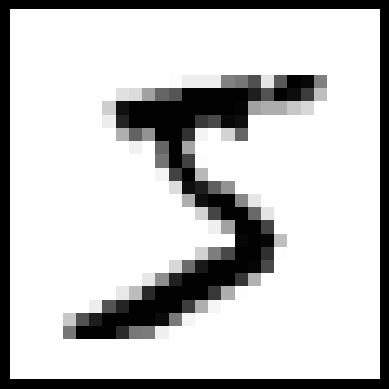

In [75]:
def plot_digit(image_data):
    image = image_data.reshape(28, 28)
    plt.imshow(image, cmap="binary")
    plt.axis("off")
some_digit = X[0]
some_digit_image = some_digit.reshape(28, 28)
plt.imshow(some_digit_image, cmap = mpl.cm.binary, interpolation="nearest")
plt.axis("off")
plt.show()

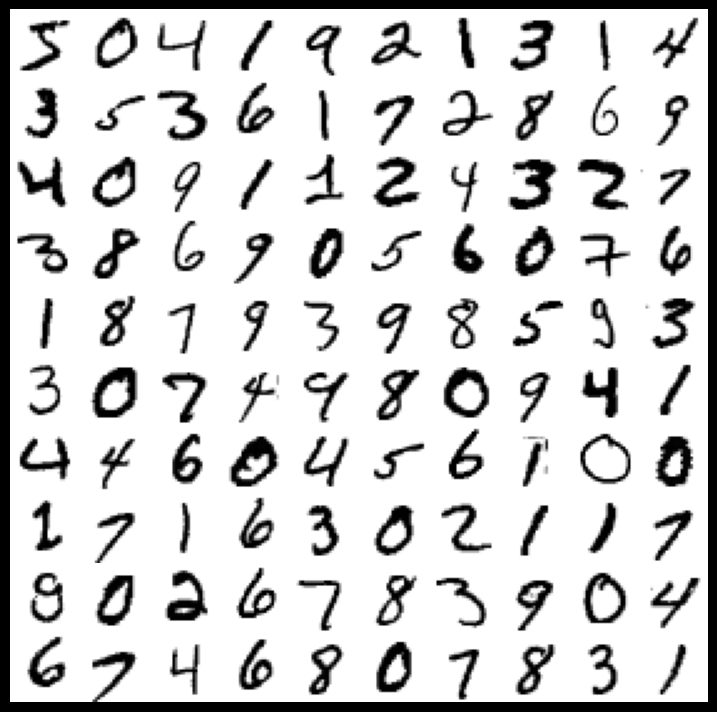

In [76]:
# extra code 
plt.figure(figsize=(9, 9))
for idx, image_data in enumerate(X[:100]):
    plt.subplot(10, 10, idx + 1)
    plot_digit(image_data)
plt.subplots_adjust(wspace=0, hspace=0)
plt.show()

In [77]:
# Train KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
knn_clf = KNeighborsClassifier()
knn_clf.fit(X_train, y_train)
baseline_accuracy = knn_clf.score(X_test, y_test)
baseline_accuracy

0.9681818181818181

In [43]:
# tuning the hyperparameterse w only on the first 10,000 images:

from sklearn.model_selection import GridSearchCV

param_grid = [{'weights': ["uniform", "distance"], 'n_neighbors': [3, 4, 5, 6]}]

knn_clf = KNeighborsClassifier()
grid_search = GridSearchCV(knn_clf, param_grid, cv=5)
grid_search.fit(X_train[:10_000], y_train[:10_000])

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid=[{'n_neighbors': [3, 4, 5, 6],
                          'weights': ['uniform', 'distance']}])

In [44]:
grid_search.best_params_

{'n_neighbors': 4, 'weights': 'distance'}

In [45]:
grid_search.best_score_

0.9441999999999998

In [46]:
# The score dropped, but that was expected since we only trained on 10,000 images. 
# train best model again on the full training set:

knn_clf = grid_search.best_estimator_.fit(X_train, y_train)
tuned_accuracy = grid_search.score(X_test, y_test)
tuned_accuracy

0.9714

### train a CNN model

In [3]:
# load data
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# reshape to be [samples][width][height][channels]
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1).astype('float32')
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1).astype('float32')

In [4]:
# normalize inputs from 0-255 to 0-1
X_train = X_train / 255
X_test = X_test / 255
# one hot encode outputs
y_train = np_utils.to_categorical(y_train)
y_test = np_utils.to_categorical(y_test)
num_classes = y_test.shape[1]

In [5]:
model = keras.models.Sequential([
                                 keras.layers.Conv2D(28,kernel_size=(3,3)),
                                 keras.layers.MaxPooling2D(),
                                 keras.layers.Flatten(),
                                 keras.layers.Dense(128,activation='relu'),
                                 keras.layers.Dense(10,activation = 'softmax')
])

In [6]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

history = model.fit(X_train, y_train, validation_split=0.2, epochs=4, batch_size=200, verbose=2)

Epoch 1/4
240/240 - 19s - loss: 0.3297 - accuracy: 0.9074 - val_loss: 0.1560 - val_accuracy: 0.9584 - 19s/epoch - 81ms/step
Epoch 2/4
240/240 - 17s - loss: 0.1252 - accuracy: 0.9638 - val_loss: 0.1050 - val_accuracy: 0.9687 - 17s/epoch - 72ms/step
Epoch 3/4
240/240 - 17s - loss: 0.0792 - accuracy: 0.9774 - val_loss: 0.0785 - val_accuracy: 0.9768 - 17s/epoch - 72ms/step
Epoch 4/4
240/240 - 16s - loss: 0.0544 - accuracy: 0.9843 - val_loss: 0.0728 - val_accuracy: 0.9792 - 16s/epoch - 66ms/step


In [11]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (200, 26, 26, 28)         280       
                                                                 
 max_pooling2d (MaxPooling2D  (200, 13, 13, 28)        0         
 )                                                               
                                                                 
 flatten (Flatten)           (200, 4732)               0         
                                                                 
 dense (Dense)               (200, 128)                605824    
                                                                 
 dense_1 (Dense)             (200, 10)                 1290      
                                                                 
Total params: 607,394
Trainable params: 607,394
Non-trainable params: 0
__________________________________________________

In [7]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


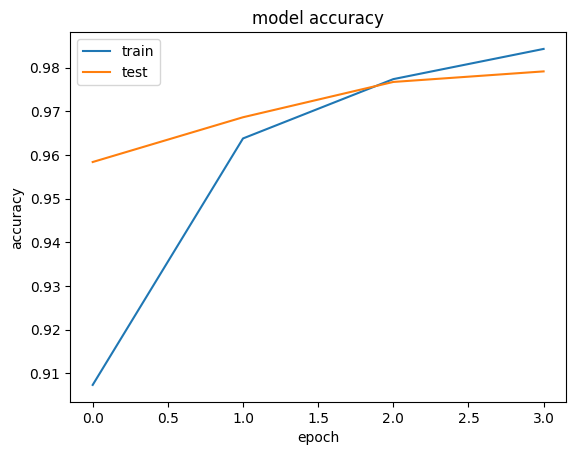

In [8]:
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

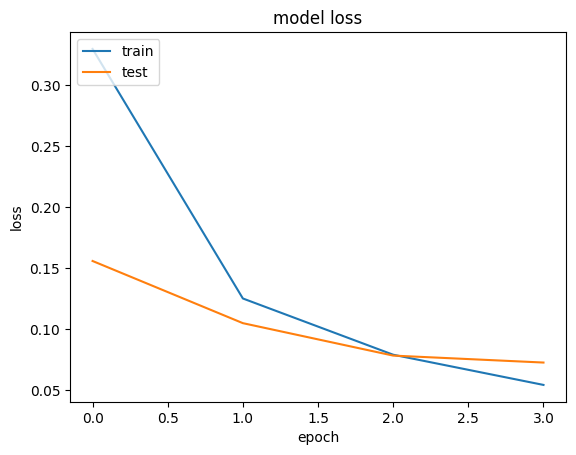

In [9]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [12]:
# save the modeel
model.save('mnist.hdf5')